In [1]:
''' replace all numbers inside a string with their corresponding words:
        only numbers delimited by word boundaries, i.e. space, period, comma are considered for replacement'''

import re
from num2words import num2words

sentence_list = ['2 double decker buses drive down a street near 3 tall buildings',
                 '2 women on a tennis court playing a game of tennis']

for item in sentence_list:
    transformed_item = item
    numbers_in_sentences = re.findall(r'\b\d+\b', item)
    numbers_to_words = [num2words(int(item)) for item in numbers_in_sentences]
    for num, word in zip(numbers_in_sentences, numbers_to_words):
        transformed_item = transformed_item.replace(num, word)
    sentence_list[sentence_list.index(item)] = transformed_item

sentence_list

['two double decker buses drive down a street near three tall buildings',
 'two women on a tennis court playing a game of tennis']

In [2]:
'''checking overlap between two rectangles'''
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y


class Rect(object):
    def __init__(self, p1, p2):
        '''Store the top, bottom, left and right values for points 
               p1 and p2 are the (corners) in either order
        '''
        self.left = min(p1.x, p2.x)
        self.right = max(p1.x, p2.x)
        self.bottom = min(p1.y, p2.y)
        self.top = max(p1.y, p2.y)

    @staticmethod
    def overlap(r1, r2):
        '''Overlapping rectangles overlap both horizontally & vertically
        '''
        h_overlaps = (r1.left <= r2.right) and (r1.right >= r2.left)
        v_overlaps = (r1.bottom <= r2.top) and (r1.top >= r2.bottom)
        return h_overlaps and v_overlaps


p1 = Point(1, 1)
p2 = Point(3, 3)
r1 = Rect(p1, p2)
p3 = Point(2, 2)
p4 = Point(4, 4)
r2 = Rect(p3, p4)

print("r1 (red),r2 (aqua): Overlap in either direction:")
print(Rect.overlap(r1, r2))
print(Rect.overlap(r2, r1))


p5 = Point(3, 6)     # overlaps horizontally but not vertically
p6 = Point(12, 11)
r3 = Rect(p5, p6)

print("r1 (red),r3 (blue): Should not overlap, either way:")
print(Rect.overlap(r1, r3))
print(Rect.overlap(r3, r1))

print("r2 (aqua),r3 (blue: Same as that")
print(Rect.overlap(r2, r3))
print(Rect.overlap(r3, r2))

p7 = Point(7, 7)
p8 = Point(11, 10)
r4 = Rect(p7, p8)    # completely inside r3

print("r4 (fuschia) is totally enclosed in r3 (blue)")
print(Rect.overlap(r3, r4))
print(Rect.overlap(r4, r3))

print("r4 (fuschia) is nowhere near r1 (red) nor r2 (aqua)")
print(Rect.overlap(r1, r4))

p09 = Point(13, 11)
p10 = Point(19, 13)
r5 = Rect(p09, p10)

p11 = Point(13, 9)
p12 = Point(15, 14)
r6 = Rect(p11, p12)

print("r5 (green) and r6 (yellow) cross without corner overlap")
print(Rect.overlap(r5, r6))
print(Rect.overlap(r6, r5))

l1 = Point(-0.5, 129.5)
r1 = Point(180.5, -0.5)
rec1 = Rect(l1, r1)

l2 = Point(-0.5, 67.5)
r2 = Point(144.5, -0.5)
rec2 = Rect(l2, r2)
print(Rect.overlap(rec1, rec2))
print(Rect.overlap(rec2, rec1))

r1 (red),r2 (aqua): Overlap in either direction:
True
True
r1 (red),r3 (blue): Should not overlap, either way:
False
False
r2 (aqua),r3 (blue: Same as that
False
False
r4 (fuschia) is totally enclosed in r3 (blue)
True
True
r4 (fuschia) is nowhere near r1 (red) nor r2 (aqua)
False
r5 (green) and r6 (yellow) cross without corner overlap
True
True
True
True


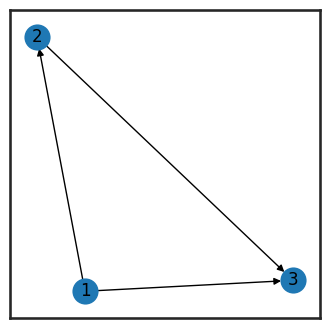

In [11]:
# create a directed graph of 3 nodes 1,2,3 and 3 edges 1-2, 2-3, 1-3
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3), (1, 3)])
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw_networkx(G, ax=ax)
plt.show()

In [29]:
# create an adjacency matrix for the graph
import numpy as np
adjacency_matrix = np.zeros((3, 3))
for edge in G.edges:
    adjacency_matrix[edge[0]-1, edge[1]-1] = 1
# remove the diagonal elements
np.fill_diagonal(adjacency_matrix, 0)
print(adjacency_matrix)

[[0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


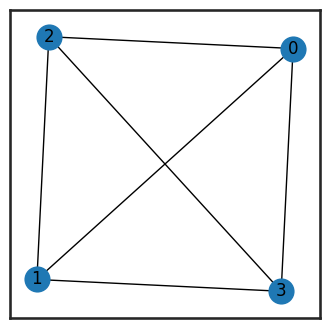

In [36]:
# plot the adjacency matrix in a graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_numpy_matrix(adjacency_matrix)
fig, ax = plt.subplots(figsize=(4, 4))
nx.draw_networkx(G, ax=ax)
plt.show()

In [ ]:
'''Since we always add a single node fully connected node to the graph, we can simply add a single row and column of 1's to the adjacency matrix at the end, and then remove the self connection'''
import numpy as np

h_aware_q_adj = []
for adj in adj_list_padded:
    adj = np.array(adj)
    adj = np.append(adj, np.ones((1, 20)), axis=0)
    adj = np.append(adj, np.ones((21, 1)), axis=1)
    adj[20][20] = 0
    # Convert the numpy array to a list
    adj = adj.tolist()
    h_aware_q_adj.append(adj)

In [47]:
import torch

# create a tensor of shape 512
x = torch.rand(512)
# pass the tensor through a linear layer to get a tensor of shape 256
y = torch.nn.Linear(512, 300)(x)
x.shape, y.shape


(torch.Size([512]), torch.Size([300]))

In [ ]:
'''Creating tuples of entries for training in the form of:
(history, question, image, answer, answer_options, gt_index)'''

data_batch = []
for dialog, history_GAP in zip(dialogs, history_batch_GAP):
    data = []
    # the images are arranged in the same order as the dialogs in the subset
    image = image_GAP[dialogs.index(dialog)]
    for round, h_GAP in zip(dialog['dialog'], history_GAP):
        history = h_GAP
        question = question_GAP[round['question']]
        answer = answer_embeddings[round['answer']]
        answer_options = [answer_embeddings[i]
                          for i in round['answer_options']]
        gt_index = round['gt_index']
        data.append((history, question, image,
                    answer, answer_options, gt_index))
    data_batch.append(data)


In [ ]:
'''Load the data batch into a Dataloader'''

import torch
from torch.utils.data import Dataset, DataLoader

dataloader = DataLoader(data_batch, batch_size=32, shuffle=True)

'''Save the dataloader'''
with open('../embeddings/fusion/control_dataloader_'+ str(subset) +'.pkl', 'wb') as f:
    pickle.dump(dataloader, f)

In [ ]:
'''I created an implmentation which generates subsets on the train dataset. When I loaded the 1% subset with the visdial dataloader, I got an error where 1233 data points had been reduced to 1232. To overcome this and make my batches the same as the visdial dataloader, I found the one data point, removing which, gave the least amount of errors while matching the question_lengths. The problematic data point was index 880. So I'll remove that while creating the encoder decoder dataloader.'''

# load the data
from visdial.data.dataset import VisDialDataset
import nltk
from nltk.tokenize import word_tokenize
import json

with open('datasets/annotations/visdial_1.0_train.json', 'r') as f:
    train_data = json.load(f)

print(len(train_data['data']['dialogs']))

print(train_data['data'].keys())

dialogs = train_data['data']['dialogs']
q = []
for dialog in dialogs:
    qr = []
    for round in dialog['dialog']:
        qr.append(train_data['data']['questions'][round['question']])
    q.append(qr)

# tokenize the questions and store the length of each question using nltk

q_len = []
for dialog in q:
    qr_len = []
    for question in dialog:
        qr_len.append(len(word_tokenize(question)))
    q_len.append(qr_len)

print(q_len[x])


train_dataset = VisDialDataset(config, 'train')

x = 0
a = train_dataset[x]['ques_len'].tolist()
# for every value in train_dataset[x]['ques_len'].tolist(), lower it by 1
a = [x - 1 for x in a]
if a == q_len[x]:
    print('True')

p = [x['ques_len'] for x in train_dataset]
p = [x.tolist() for x in p]

# copy
y = q_len.copy()
# remove index 438 from y
y.pop(880)
len(y)

q[880]

for a, b in zip(y, p):
    b = [x - 1 for x in b]
    if a != b:
        print(q_len.index(a))
        # gives us some more "problematic" indices but they include questions with length 21 which have been padded in my implementation to 20


In [2]:
# use allennlp's coreference resolution model
from allennlp.predictors.predictor import Predictor
import allennlp_models.coref

predictor = Predictor.from_path(
    "https://storage.googleapis.com/allennlp-public-models/coref-spanbert-large-2021.03.10.tar.gz")



Some weights of BertModel were not initialized from the model checkpoint at SpanBERT/spanbert-large-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'top_spans': [[0, 1],
  [3, 3],
  [5, 8],
  [5, 14],
  [8, 8],
  [11, 13],
  [11, 14],
  [13, 13],
  [16, 18],
  [16, 22],
  [20, 22],
  [24, 24],
  [26, 52],
  [33, 33],
  [36, 36],
  [37, 37],
  [38, 52],
  [41, 42],
  [47, 47],
  [48, 48],
  [49, 52]],
 'antecedent_indices': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 